In [27]:
# please upload the zip file of faces before running
#!unzip faces.zip

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  numpy.linalg as la
import cv2
import os
#from google.colab.patches import cv2_imshow

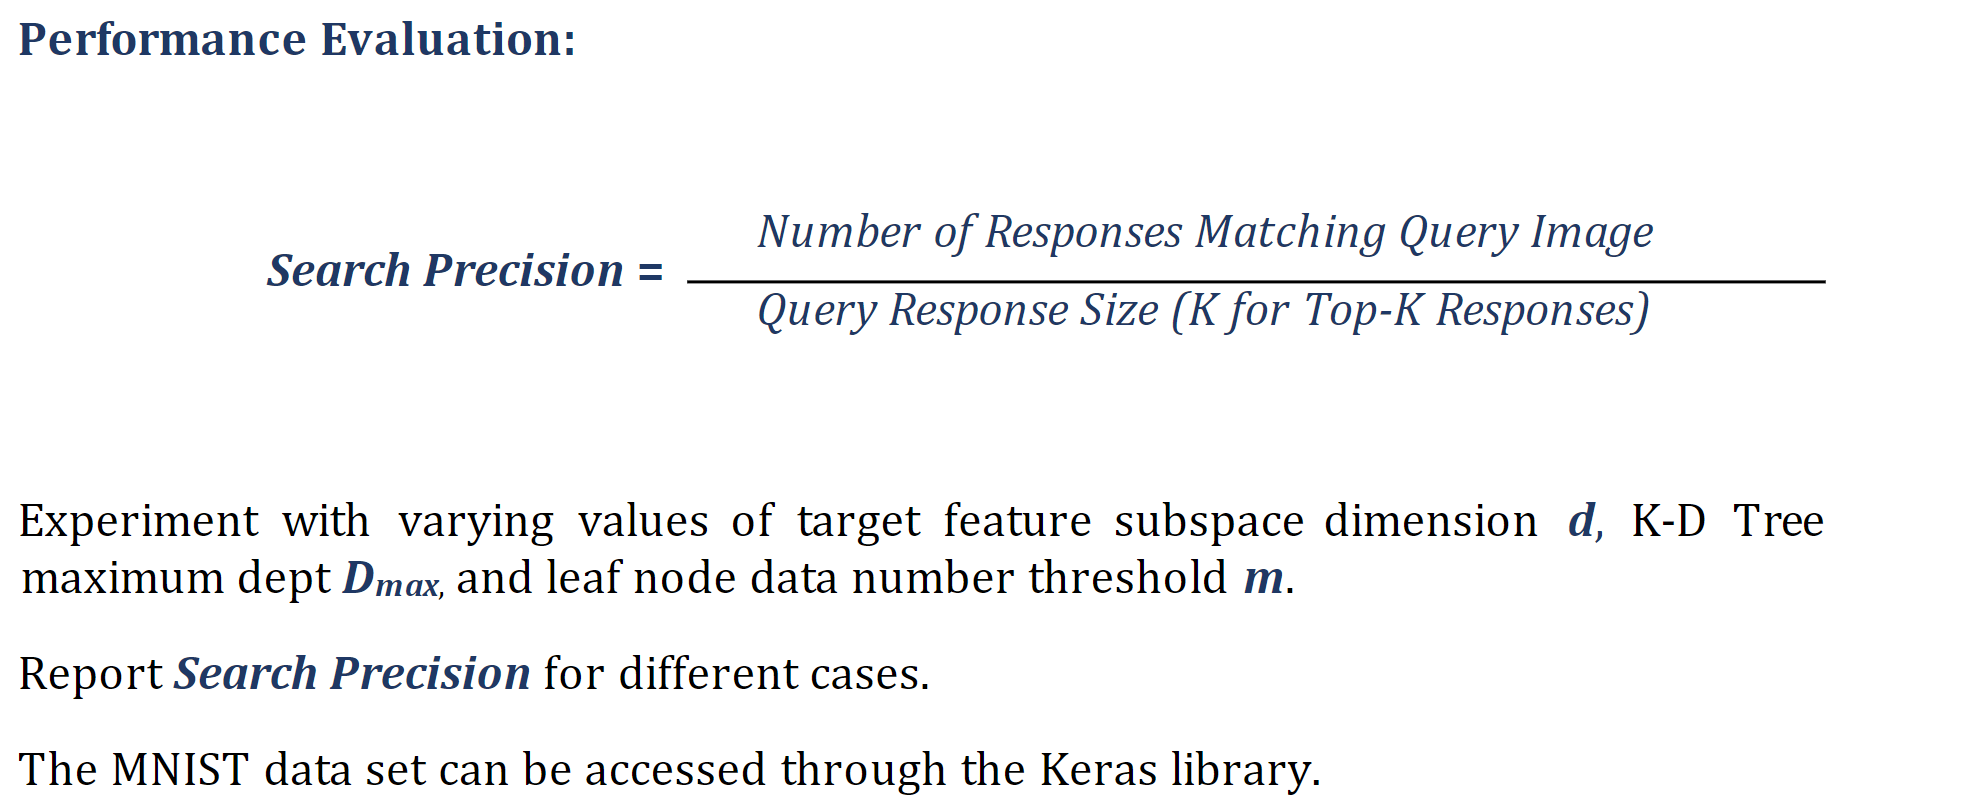

In [29]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


In [30]:
X_train_data = np.copy(X_train)
X_train.shape

(60000, 28, 28)

In [31]:
X_test_data = np.copy(X_test)
X_test.shape

(10000, 28, 28)

In [32]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
print("Trian data shape : ",X_train.shape)
print("Test data shape : ",X_test.shape)

Trian data shape :  (60000, 784)
Test data shape :  (10000, 784)


In [33]:
def PCA(data,k):
    mean = np.mean(data,axis=0)
    y = data - mean
    print(y.shape)
    y = y.T
    co_var = np.cov(y@y.T)
    eig_values,eig_vectors = la.eigh(co_var)
    sum_ = np.sum(eig_values)
    sort_eig_value_index = np.argsort(eig_values)[::-1][:k]
    eig_values = eig_values[sort_eig_value_index]
    eig_vectors = eig_vectors[sort_eig_value_index]
    #print(eig_values)
    #print(eig_vectors)
    print("% of varience preserved after Dimention Reduction : ",(np.sum(eig_values)/sum_)*100)
    #print(eig_vectors.shape)
    return mean,eig_vectors

In [34]:
def transform_data(mean,Q,data):
    transform_data = Q@(data-mean).T
    transform_data = transform_data.T
    return transform_data

In [35]:
k = 500
mean,eig_vectors = PCA(X_train,k)
print(eig_vectors.shape)

(60000, 784)
% of varience preserved after Dimention Reduction :  99.99997866087503
(500, 784)


In [36]:
transform_train_data = transform_data(mean,eig_vectors,X_train)
print(transform_train_data.shape)
transform_test_data = transform_data(mean,eig_vectors,X_test)
print(transform_test_data.shape)

(60000, 500)
(10000, 500)


In [37]:
class Node :
    def __init__(self,median,dim) -> None:
        self.left = None
        self.right = None
        self.median = median
        self.dim = dim

In [38]:
def KD_Tree(indices,map,labels,data,min_child,max_depth,cur_depth,tag):
    if len(data) <= min_child or cur_depth >= max_depth:
        print(len(data))
        map[tag] = data
        labels[tag] = indices
        return None

    dim = np.argmax(np.var(data,axis=0))
    median = np.median(data[:,dim])

    condition = data[:,dim] < median

    root = Node(median,dim)

    root.left = KD_Tree(indices[condition],map,labels,data[condition],min_child,max_depth,cur_depth+1,tag+'0')
    root.right = KD_Tree(indices[~condition],map,labels,data[~condition],min_child,max_depth,cur_depth+1,tag+'1')

    return root


In [39]:
# def KD_Tree(indices,labels,original,data,min_child,max_depth,depth,tag,map,parameters):
#     if len(data) <= min_child or depth >= max_depth:
#         print(len(original))
#         map[tag] = data
#         labels[tag] = indices
#         return None

#     dim = np.argmax(np.var(data,axis=0))
#     median = np.median(data[:,dim])

#     condition = data[:,dim] < median


#     parameters.append([dim,median])
#     root = Node(median,dim)

#     root.left = KD_Tree(indices[condition],labels,original[condition],data[condition],min_child,max_depth,depth+1,tag+'0',map,parameters)
#     root.right = KD_Tree(indices[~condition],labels,original[~condition],data[~condition],min_child,max_depth,depth+1,tag+'1',map,parameters)
#     return root

In [40]:
map = dict()
labels = dict()
parameters = []
indices = np.arange(len(transform_train_data))
root = KD_Tree(indices,map,labels,transform_train_data,50,15,0,"")

29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
30
29
30
29
29
29
30
29
29
29
30
29
29
29
30
29
2

In [41]:
def simillar_images(root,test,tag):
    #print(tag)
    if root == None :
        return tag
    else:
        median = root.median
        dim = root.dim

        if test[dim] < median:
            return simillar_images(root.left,test,tag+'0')
        else:
            return simillar_images(root.right,test,tag+'1')

7
Binary Tag : 89


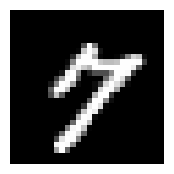

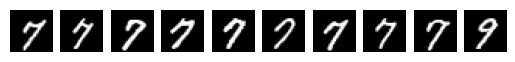

Precision :  0.9


5
Binary Tag : 65


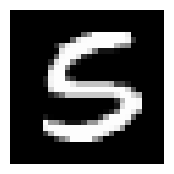

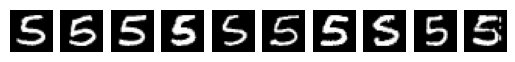

Precision :  1.0


5
Binary Tag : 06


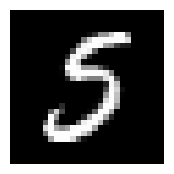

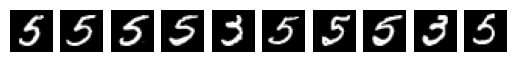

Precision :  0.8


0
Binary Tag : 68


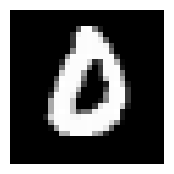

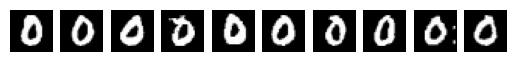

Precision :  1.0


4
Binary Tag : 38


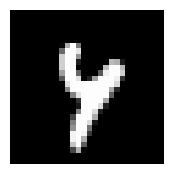

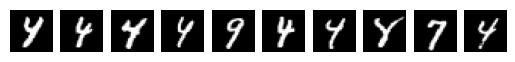

Precision :  0.7


3
Binary Tag : 55


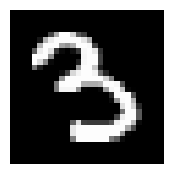

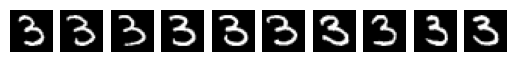

Precision :  1.0


7
Binary Tag : 97


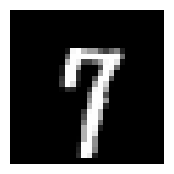

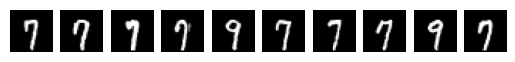

Precision :  0.8


8
Binary Tag : 69


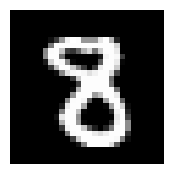

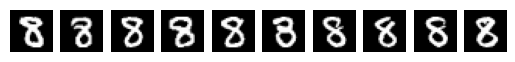

Precision :  0.9


3
Binary Tag : 53


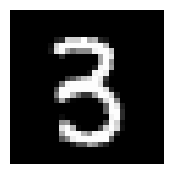

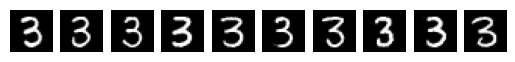

Precision :  1.0


4
Binary Tag : 26


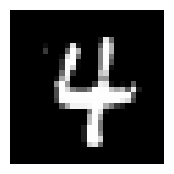

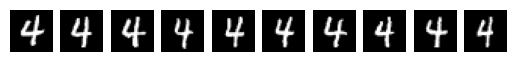

Precision :  1.0


3
Binary Tag : 44


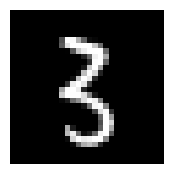

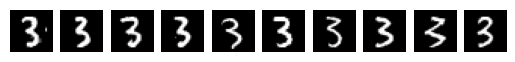

Precision :  1.0


2
Binary Tag : 54


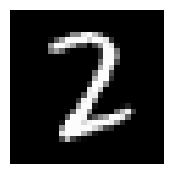

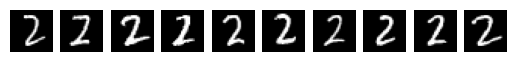

Precision :  1.0


0
Binary Tag : 75


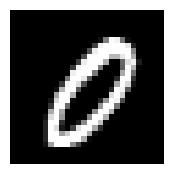

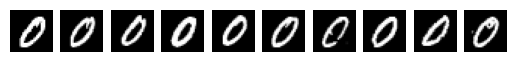

Precision :  1.0


8
Binary Tag : 94


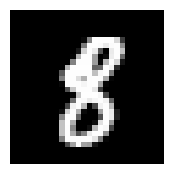

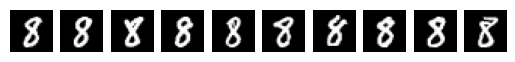

Precision :  1.0


3
Binary Tag : 53


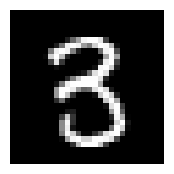

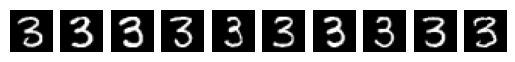

Precision :  1.0




In [56]:
test_indices = np.random.uniform(0,len(transform_test_data),15).astype(int)
#print(list(map.keys()))
Top_k = 10
for index in test_indices:
    res = 0
    plt.figure(figsize = (2,2))
    plt.imshow(X_test_data[index],cmap='gray', vmin=0, vmax=255)
    plt.axis("off")
    digit = Y_test[index]
    print(digit)
    tag,imgs = '',[]
    tag = simillar_images(root,transform_test_data[index],tag)
    print("Binary Tag :",tag)
    test = transform_test_data[index].reshape(-1)

    match_ = map[tag].reshape(-1,len(test))
    for i in np.argsort(la.norm((match_-test),axis = 1))[:Top_k]:
        img_index = labels[tag][i]
        if digit == Y_train[img_index]:
            res+=1
        imgs.append(X_train_data[img_index])
    _, axs = plt.subplots(1,Top_k)
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        ax.imshow(img,cmap='gray', vmin=0, vmax=255)
        ax.axis("off")
    plt.show()
    print("Precision : ",res/Top_k)
    print("\n")


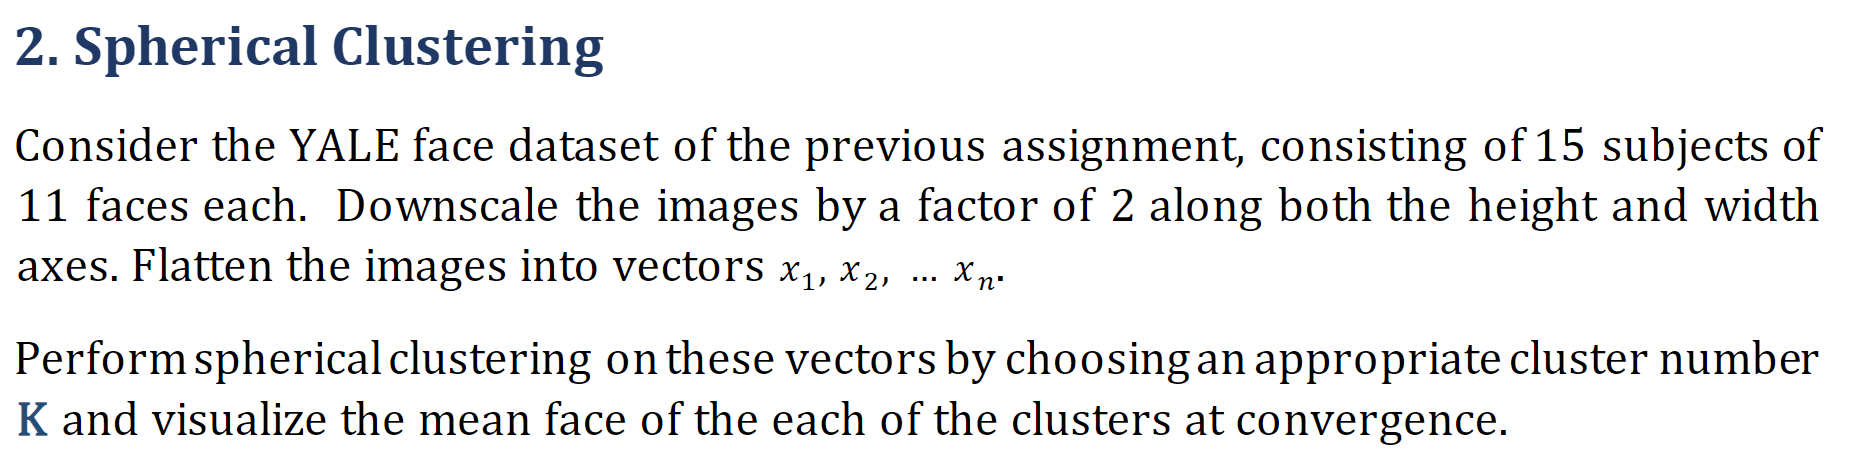

In [ ]:
import cv2

In [ ]:
def load_images_from_folder(folder):
    images = []
    data = []
    count = 1
    list_images = sorted(os.listdir(folder))
    for filename in list_images:
        img = cv2.imread(os.path.join(folder,filename))
        #print(img.shape)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        images.append(img)
        #print(img.shape)
        #img = 0.75*np.power(img,1.1)

        scale_percent = 50
        #calculate the 50 percent of original dimensions
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)

        # dsize
        dsize = (width, height)

        # resize image
        img = cv2.resize(img, dsize)
        data.append(img.reshape(-1))
        #cv2_imshow(img)
        #print(filename)
        count+=1
    images = np.array(images)
    data = np.array(data)
    return images,data

In [ ]:
def Spherical_K_Means(K,data,tol):
    labels = np.random.choice(np.arange(K),len(data),replace=True)
    #print(len(labels))
    all_unique_labels = np.unique(labels,return_counts = True)
    #print(all_unique_labels)

    if len(all_unique_labels[0]) != K:
        print("All unique labels not present.")
        return

    mean = []
    for i in range(K):
        mean.append(np.mean(data[np.argwhere(labels == i)],axis=0).reshape(-1))

    mean = np.array(mean)
    #print(mean.shape)
    lenght = la.norm(mean,axis = 1)
    #print(lenght)
    for i,mean_vector in enumerate(mean):
        mean[i] = mean_vector/lenght[i]
    #lenght = la.norm(mean,axis = 1)
    #print(lenght)
    pre_mean = np.zeros(shape = mean.shape)
    # print(mean)
    # print("\n\n")
    # print(np.sum(mean*pre_mean,axis = 1))

    while min(np.sum(mean*pre_mean,axis = 1)) < (1-tol):
        pre_mean = np.copy(mean)

        # Update the labels of each datapoint
        for i in range(len(data)):
            #print(np.argmax(np.sum(data[i]*pre_mean,axis = 1)))
            labels[i] = np.argmax(np.sum(data[i]*pre_mean,axis = 1))

        mean = []
        # Centroid Re-estimation for each cluster
        for i in range(K):
            mean.append(np.mean(data[np.argwhere(labels == i)],axis=0).reshape(-1))
        mean = np.array(mean)

        #print(mean.shape)
        lenght = la.norm(mean,axis = 1)

        # Normalizing the mean vectors
        for i,mean_vector in enumerate(mean):
            mean[i] = mean_vector/lenght[i]

        print(min(np.sum(mean*pre_mean,axis = 1)))
    return mean,labels

In [ ]:
images,data = load_images_from_folder('faces')
print("Data shape : ",data.shape)
print("Image shape : ",images.shape)


FileNotFoundError: ignored

In [ ]:
lengths = la.norm(data,axis = 1)
data = data.astype(float)
for i in range(len(data)):
    data[i] = data[i]/lengths[i]

In [ ]:
means,labels = Spherical_K_Means(20,data,10**-3)
print(means.shape)

In [ ]:
labels = np.array(labels)
print(np.unique(labels,return_counts=True))
#print(images.shape)
for i in range(20):
    indices = np.argwhere(labels == i).astype(int)
    #print(indices)
    mean = np.zeros(shape = images[0].shape)
    for index in indices:
        mean = images[index[0]]+mean
    cv2_imshow(mean/len(indices))

In [45]:
class Node :
    def __init__(self,mean):
        self.childern = [None]*10
        self.mean = mean

In [46]:
def K_means(K,data,tol):
    labels = np.random.choice(np.arange(K),len(data),replace=True)
    #print(len(labels))
    all_unique_labels = np.unique(labels,return_counts = True)
    #print(all_unique_labels)

    if len(all_unique_labels[0]) != K:
        print("All unique labels not present.")
        return

    mean = []
    for i in range(K):
        mean.append(np.mean(data[np.argwhere(labels == i)],axis=0).reshape(-1))

    mean = np.array(mean)
    print(mean.shape)
    pre_mean = np.zeros(shape = mean.shape)
    #print(la.norm((pre_mean - mean),axis = 1))
    while np.max(la.norm((pre_mean - mean),axis = 1)) > tol:
        pre_mean = np.copy(mean)
        for i in range(len(data)):
            labels[i] = np.argmin(la.norm((pre_mean - data[i]),axis = 1))

        mean = []
        for i in range(K):
            mean.append(np.mean(data[np.argwhere(labels == i)],axis=0).reshape(-1))
        mean = np.array(mean)
        print(np.max(la.norm((pre_mean - mean),axis = 1)))
    return mean

In [47]:
def Hier_K_Means(indices,map,labels,data,min_child,max_depth,cur_depth,tag):
    if  len(data) <= min_child or cur_depth >= max_depth:
        map[tag] = data
        labels[tag] = indices
        print(len(data))
        return None
    means = K_means(10,data,35)
    root = Node(means)
    label = np.zeros(len(data))
    for i in range(len(data)):
            label[i] = np.argmin(la.norm((means - data[i]),axis = 1))
    label = label.astype(int)
    print(np.unique(label,return_counts=True))

    for k in range(10):
            root.childern[k] = Hier_K_Means(indices[label == k],map,labels,data[label == k],min_child,max_depth,cur_depth+1,tag+str(k))
    return root

In [48]:
map = dict()
labels = dict()
indices = np.arange(len(transform_train_data)).astype(int)
root = Hier_K_Means(indices,map,labels,transform_train_data,500,2,0,"")

(10, 500)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([ 2578,   958,  4532, 14670,  3472,  6874,  7032, 11029,  3569,
        5286], dtype=int64))
(10, 500)
635.2188164816293
280.08877714286797
152.23121012494113
113.31625848760336
70.07684195746425
46.12851968789726
43.76935908233291
57.410405880691265
77.40354437460691
111.92273638962538
77.2456966916475
72.05010977695024
51.48715337441439
46.520173134351545
28.06896219423567
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([220, 228, 281, 278, 385, 214, 257, 265, 264, 186], dtype=int64))
220
228
281
278
385
214
257
265
264
186
(10, 500)
623.5071181476891
291.2494415952765
190.1977184921298
160.91856427144617
228.48427202374938
216.10785866942993
188.06751805240697
126.81657749367973
47.07210260277214
41.52777727914067
23.524760929463604
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([110,  64, 120,  84,  91, 135,  97,  86,  99,  72], dtype=int64))
110
64
120
84
91
135
97
86
99
72
(10, 500)
805.9879359402831
402.4435937207914
248.05643338549416


In [49]:
len(list(map.keys()))

100

In [50]:
def simillar_images(root,test,tag):
    if root == None:
        return tag
    else:
        means = root.mean
        label = np.argmin(la.norm((means - test),axis = 1))
        return simillar_images(root.childern[label],test,tag+str(label))

7
96


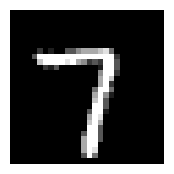

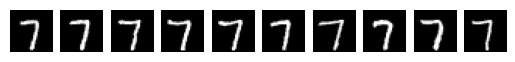

Precision :  1.0


3
50


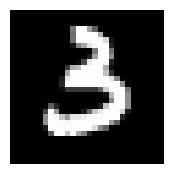

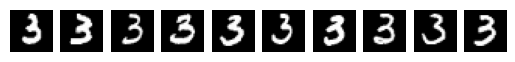

Precision :  1.0


0
75


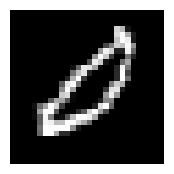

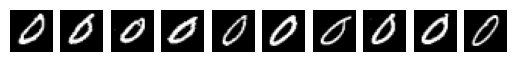

Precision :  1.0


1
35


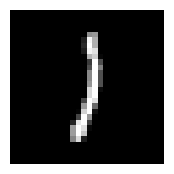

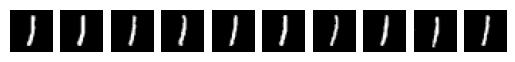

Precision :  1.0


7
99


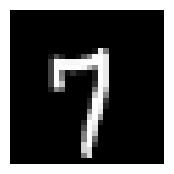

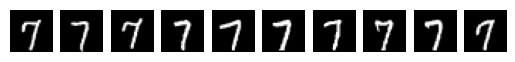

Precision :  1.0




In [55]:
test_indices = np.random.uniform(0,len(transform_test_data),5).astype(int)
top_K = 10
for index in test_indices:
    res = 0
    plt.figure(figsize = (2,2))
    plt.imshow(X_test_data[index],cmap="gray",vmin=0,vmax=255)
    plt.axis("off")
    #cv2_imshow(X_test_data[index])
    digit = Y_test[index]
    print(digit)
    tag,imgs = '',[]
    tag = simillar_images(root,transform_test_data[index],tag)
    print(tag)
    test = transform_test_data[index].reshape(-1)
    match_ = map[tag].reshape(-1,len(test))
    for i in np.argsort(la.norm((match_-test),axis = 1))[:top_K]:
        img_index = labels[tag][i]
        if digit == Y_train[img_index]:
            res+=1
        imgs.append(X_train_data[img_index])
    _, axs = plt.subplots(1,Top_k)
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        ax.imshow(img,cmap='gray', vmin=0, vmax=255)
        ax.axis("off")
    plt.show()
    print("Precision : ",res/top_K)
    print("\n")

In [ ]:
K = 10
tol = 10
means = K_means(K,transform_train_data,tol)


(10, 500)
799.6923489109088
297.4164471594861
257.5762764832083
159.58347383484949
209.62389346894452
179.41156800746435
98.41390250552607
54.63653530247334
35.94306582866512
38.06823759666685
39.6988950419394
34.43014152688402
30.399059725313727
27.736311877998993
33.02275083139746
37.50919204699113
40.78403042183762
46.6332430880187
52.260834204276016
62.00815288826347
61.113812052204544
51.69600845023165
39.92401068107441
30.49012423916081
25.248370757313484
19.919985230146946
16.39701954229432
12.225720801812026
11.389065358097922
10.296148309720817
9.790003787830564


In [ ]:
print(means.shape)